(1) 生成兩組在區間上滿足均勻分佈(uniform distribution)的隨機數[0,1]，並為每組創建 10,000 個均勻隨機數。均勻隨機數可以從某個數到另一個數之一致概率生成的隨機函數np.random.uniform來產生。例如，np.random.uniform(0.0, 1.0, 10)可以生成 0 到 1 範圍內的 10 個均勻隨機數值。

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_min, x_max = 0.0, 1.0
np.random.uniform(x_min, x_max, 1000)

array([4.41630559e-01, 9.08065180e-01, 2.04962554e-01, 5.98681378e-01,
       4.83463065e-01, 6.81951949e-01, 8.81358914e-01, 2.55728459e-03,
       3.03673605e-01, 6.49536070e-01, 3.78331736e-01, 6.02071409e-01,
       5.04667232e-01, 1.07372356e-02, 2.35598317e-01, 6.88935962e-01,
       9.94214431e-01, 2.99290771e-01, 7.98363066e-01, 9.64547728e-01,
       2.12640788e-01, 8.22631633e-01, 5.44046022e-01, 9.52424855e-01,
       2.29980800e-01, 3.37437485e-01, 8.59793686e-01, 3.80987804e-01,
       1.17510518e-01, 8.70523468e-01, 5.43554385e-01, 8.04504147e-01,
       1.45963826e-01, 1.55084558e-01, 4.60207274e-01, 8.80310235e-01,
       4.15245433e-01, 1.88073922e-01, 1.35488882e-01, 9.34894125e-01,
       1.55161874e-01, 6.95643519e-01, 6.21420716e-01, 6.35617828e-01,
       6.06540394e-01, 9.59713514e-01, 8.79659360e-02, 4.97067745e-01,
       4.84403265e-01, 3.75990288e-02, 8.97872225e-01, 3.89470615e-01,
       1.96011961e-01, 2.12003307e-01, 1.40481726e-01, 8.72136918e-01,
      

（2）在𝑥 – 𝑦平面上，假設平面中心為(0,0), 考慮一個半徑為 1 的圓和一個邊長為 2的正方形。此時圓的面積為𝜋圓周率而正方形的面積是4。計算方式是檢討有多少(x,y)配對點在這個產生的10,000 個隨機數中的組合中會有多少個點在圓圈內？在這裡, 一個配對點(x,y)進入一個圓圈的內部表示坐標原點與配對點（𝑥 ，𝑦 ）之向量長度是否小於或等於1的情況為判據。計算之長度以歐幾里得範數計算(就是三角形之斜邊長)。在 Python 中，math.hypot(x,y)您可以使用計算。

In [3]:
import math
m = 10000
n = 0
x = np.random.uniform(0.0,1.0,10000)
y = np.random.uniform(0.0,1.0,10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1

(3)半徑為1的圓的面積與長度為2的正方形面積之比為𝜋:4, 或是圓周率/4:1所以，讓我們使用這個和之前的結果來找到 pi。

In [4]:
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.138


In [8]:
np.random.randn(0,10,1000)

array([], shape=(0, 10, 1000), dtype=float64)

(4)如果產生之亂數以不同機率分配產生, 其結果會不同嗎? (例如使用標準常態或是其他分配?)

In [11]:
m = 10000
n = 0
x = np.random.rand(10000)
y = np.random.rand(10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1

In [12]:
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.1664


(5) 計算之結果是用繪圖方式繪出趨勢. 

Text(0.5, 1.0, '$\\pi\\approx3.164$')

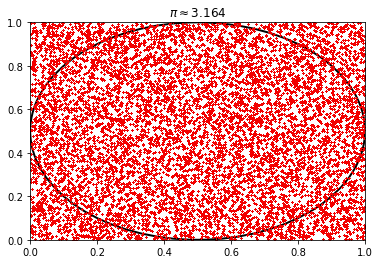

In [33]:
m = 10000
n = 0
inCircle_point = []
outCirclt_point = []
x = np.random.uniform(0.0,1.0,10000)
y = np.random.uniform(0.0,1.0,10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1
        inCircle_point.append([x, y])
    else:
        outCirclt_point.append([x, y])
        
pi = 4 * n / m
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.add_patch(patches.Circle((0.5,0.5),0.5, fill=False, lw=2))
ax1.plot(np.array(inCircle_point)[:,0], np.array(inCircle_point)[:,1], 'go', alpha=0.3, markersize=0.5)
ax1.plot(np.array(outCirclt_point)[:,0], np.array(outCirclt_point)[:,1], 'ro', alpha=0.3, markersize=0.5)
plt.axis([0,1,0,1])
plt.title('$\pi\\approx' + str(pi) + '$')
#plt.show()

pi:  3.15


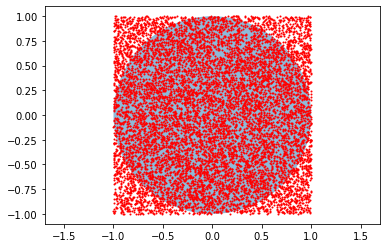

In [1]:
# PI-pro2.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
 
# 投针次数
n = 10000
 
# 圆的信息
r = 1.0         # 半径
a, b = (0., 0.) # 圆心
 
# 正方形区域边界
x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r
 
# 在正方形区域内随机投点，(x,y)构成 n 个点
x = np.random.uniform(x_min, x_max, n)   # 均匀分布
y = np.random.uniform(y_min, y_max, n)
 
# 计算 点到圆心的距离
d = np.sqrt((x-a)**2 + (y-b)**2)
 
# 统计 落在圆内的点的数目
res = sum(np.where(d < r, 1, 0))
 
# 计算 PI 的近似值（Monte Carlo方法的精髓：用统计值去近似真实值）
pi = 4 * res / n
 
print('pi: ', pi)
 
# 画个图看看
fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.plot(x, y,'ro',markersize = 1)
plt.axis('equal') # 防止图像变形
 
circle = Circle(xy=(a,b), radius=r, alpha=0.5)
axes.add_patch(circle)
 
plt.show()

pi:  3.1496


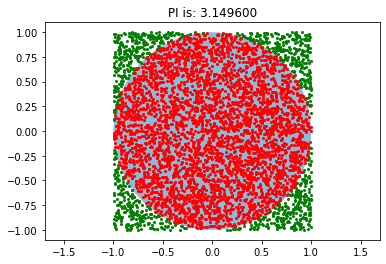

In [2]:
# PI-pro3.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
 
# 投点次数
n = 5000
 
# 圆的信息
r = 1.0         # 半径
a, b = (0., 0.) # 圆心
 
# 正方形区域边界
x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r
 
# 在正方形区域内随机投点
x = np.random.uniform(x_min, x_max, n) # 均匀分布
y = np.random.uniform(y_min, y_max, n)
 
# 计算 点到圆心的距离
d = np.sqrt((x-a)**2 + (y-b)**2)
 
# 统计 落在圆内的点的数目
ind = np.where(d <= r, 1, 0)
res = sum(ind)
 
# 计算 pi 的近似值（Monte Carlo方法的精髓：用统计值去近似真实值）
pi = 4 * res / n
 
print('pi: ', pi)
 
# 画个图看看，画图比较耗费时间
fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.set_title('PI is: %f'  %pi)    # 在图中标题栏显示计算的 PI值

for i in range(len(ind)):
    if ind[i] == 1:
        axes.plot(x[i], y[i],'ro',markersize = 2)  # 圆内一种颜色
    else:
        axes.plot(x[i], y[i],'go',markersize = 2)  # 圆外另一种颜色

plt.axis('equal') # 防止图像变形
 
circle = Circle(xy=(a,b), radius=r, alpha=0.5)
axes.add_patch(circle)
 
plt.show()